In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(ggfittext)
library(stringr)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘ggfittext’ was built under R version 4.0.3”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_trans/for_publish_v3/'

In [3]:
file_main <- 'test.tsv'
df_main <- read.table(file_main, header = TRUE, sep = "\t")
print(dim(df_main))

[1] 918557    356


In [4]:
# filter df
df_flt <- df_main %>%
filter(SN_GB >= 50)

print(dim(df_flt))

[1] 892324    356


In [5]:
### clean features
fts = c('PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr', 
        'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr', 
        'PLIp9_cds + PLIp9_utr', 
        'LOWPLI_cds + LOWPLI_utr',

        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron', 
        
        'FDR_ASD_cds + FDR_ASD_utr', 
        'FDR_ASD_intron')
fts_labels = c('fetal brain expressed genes with pLI≥.9, exonic', 
               'fetal brain expressed genes, exonic', 
               'pLI≥.9, exonic', 
               'pLI≤.9, exonic',

               'fetal brain expressed genes with pLI≥.9, intronic',
               'fetal brain expressed genes, intronic', 
               'pLI≥.9, intronic', 
               'pLI≤.9, intronic', 
               
               'ASD FDR, exonic',
               'ASD FDR, intron')
fts_col_names = c('fetal_brain_genes_pli_exonic', 
                  'fetal_brain_genes_exonic', 
                  'pli_genes_exonic', 
                  'lowpli_genes_exonic', 
                  'fetal_brain_genes_pli_intronic', 
                  'fetal_brain_genes_intronic', 
                  'pli_genes_intronic', 
                  'lowpli_genes_intronic', 
                  'asd_genes_exonic', 
                  'asd_genes_intronic')

In [6]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1] "======================================================="
[1] "X_PLIp9_DEV_BR_GENE_10_cds" "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_DEV_BR_GENE_10_cds" "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_cds" "X_PLIp9_utr"
[1] "X_LOWPLI_cds" "X_LOWPLI_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_FDR_ASD_cds" "X_FDR_ASD_utr"
[1] "X_FDR_ASD_intron"
[1] "ORs:"
 [1] 2.5407407 1.2615207 1.2832031 1.0632462 0.9395731 1.1232497 1.0222064
 [8] 1.0442570 2.4615385 1.4084848
[1] "tr_case_ntr_case:"
 [1] "49/45"       "120/124"     "108/128"     "506/520"     "749/1027"   
 [6] "1453/1828"   "2218/2736"   "15243/17138" "20/13"       "196/231"    
[1] "tr_con_ntr_con:"
 [1] "12/28"      "56/73"      "48/73"      "259/283"    "496/639"   
 [6] "852/1204"   "1303/1643"  "8680/10191" "5/8"        "100/166"   
[1] "pval.bin.cases:"
 [1] 7.571891e-01 8.477487e-01 2.160781e-01 6.848703e-01 4.516793e-11
 [6] 6.307424e-11 1.953803e-13 6.398888e-26

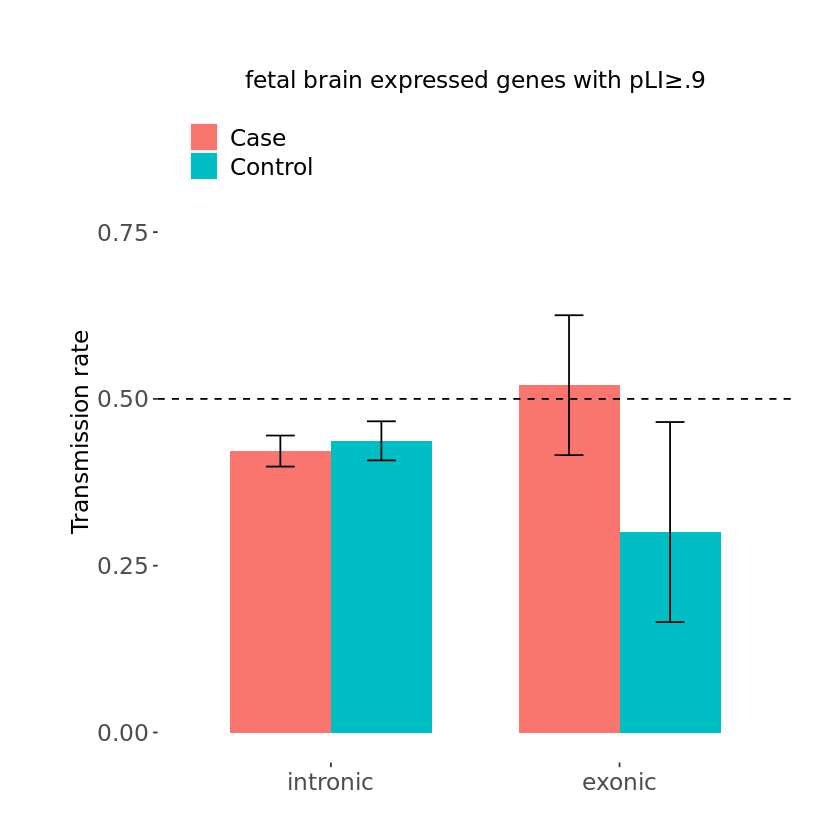

[1] "R_trans/for_publish_v3/TRs_PLI_ZS3_supp3.png"


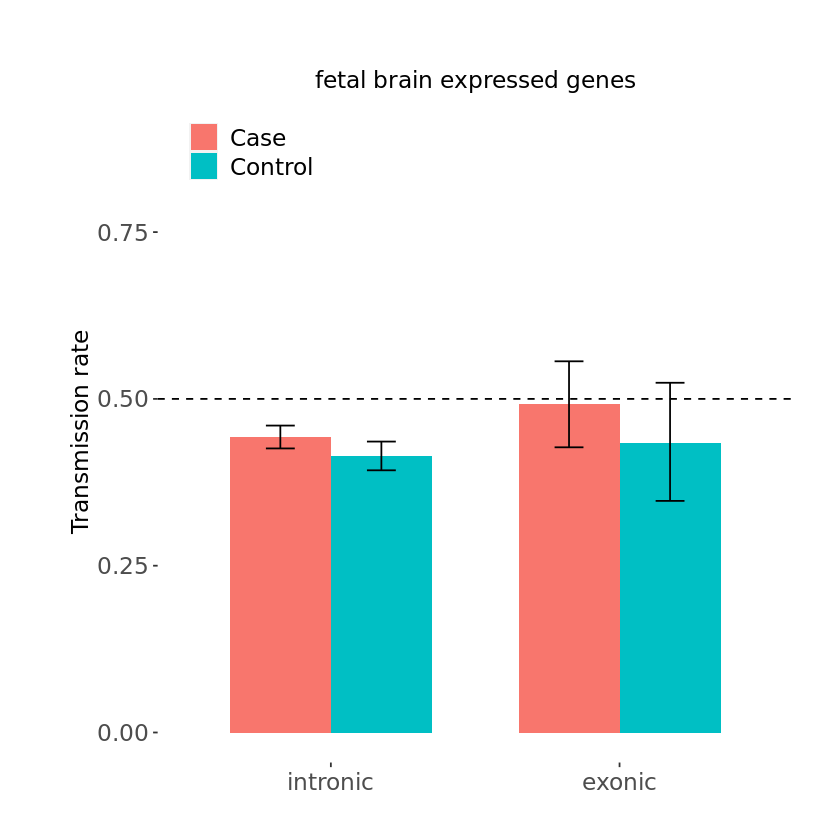

[1] "R_trans/for_publish_v3/TRs_LOWPLI_ZS3_supp3.png"


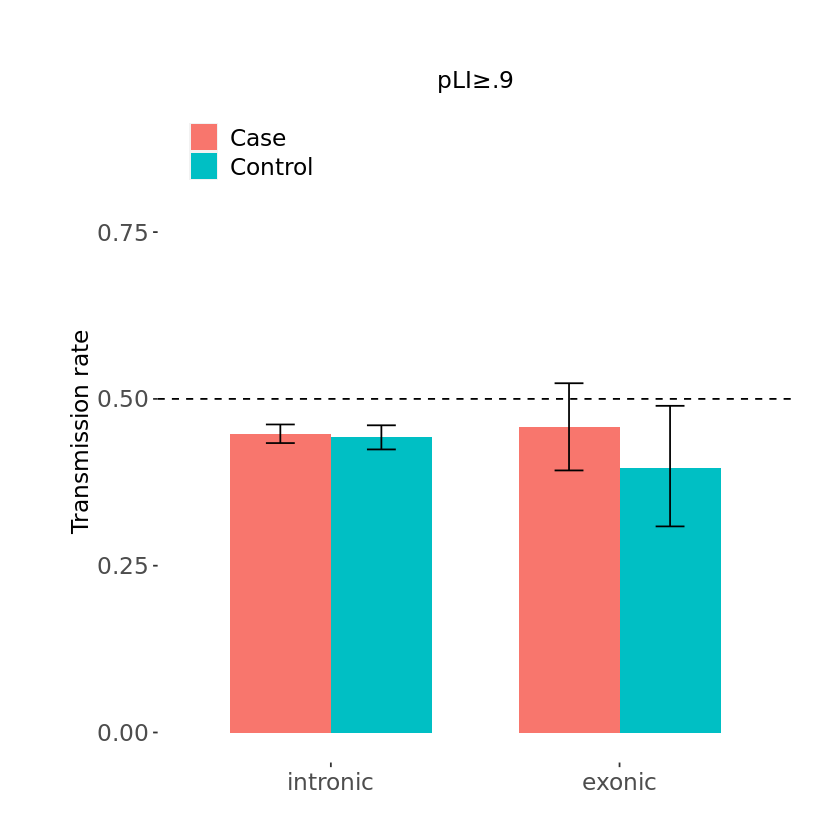

[1] "R_trans/for_publish_v3/TRs_FDR_ASD_ZS3_supp3.png"


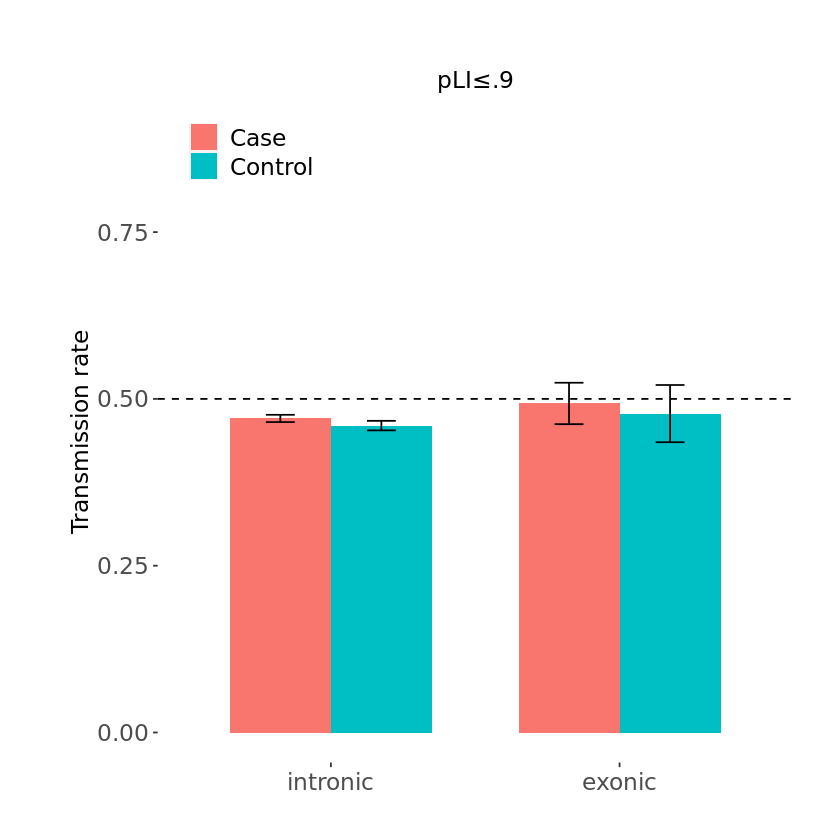

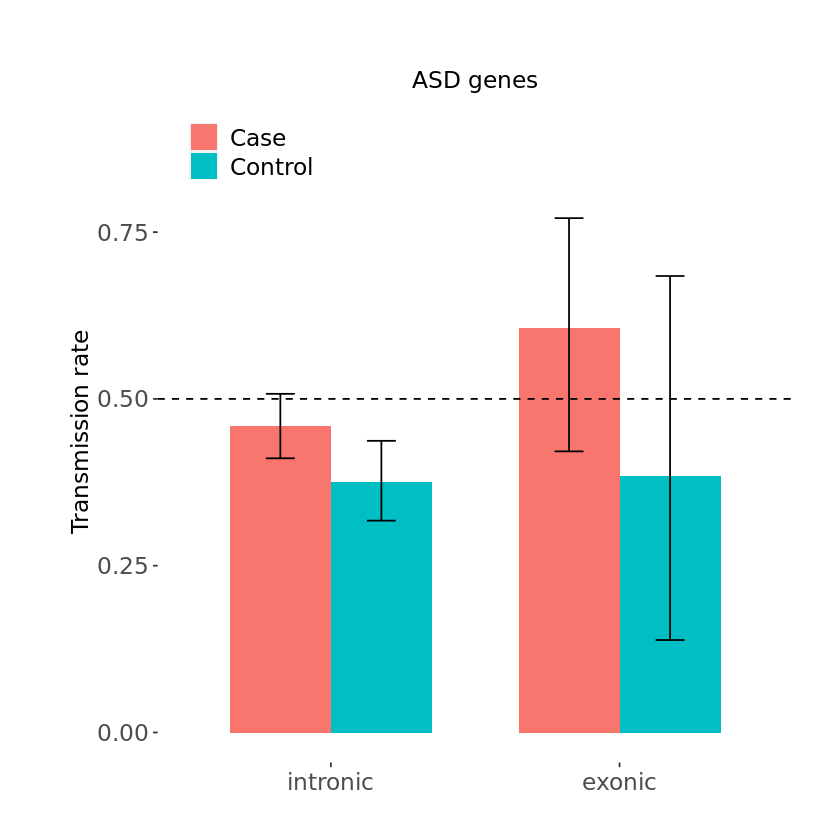

In [9]:
all_zs_thrs = c(3, 5, 7, 9)
supp_thr = 3
print_stuff = F

#for (i_zs in 1:length(all_zs_thrs)) {
for (i_zs in 1:1) {
    zs_thr = all_zs_thrs[i_zs]
    print('=======================================================')

    ORs = c()
    pvals = c()
    tr_cases = c()
    ntr_cases = c()
    tr_cons = c()
    ntr_cons = c()
    pval.bin.cases = c()
    pval.bin.controls = c()
    lb.bin.cases = c()
    lb.bin.controls = c()
    ub.bin.cases = c()
    ub.bin.controls = c()
    tr.rate.cases = c()
    tr.rate.controls = c()
    #for (ft in fts[c(11:11)]) {
    for (ft in fts) {
        ft_tmp = unlist(strsplit(ft, split='+', fixed=TRUE)) # split vars with +
        ft_tmp = str_trim(ft_tmp) # trim spaces
        ft_tmp = paste0('X_', ft_tmp) # add X_
        print(ft_tmp)
        tran_case = 0
        tran_control = 0
        nontran_case = 0
        nontran_control = 0
        for (ft_ in ft_tmp) {
            df_w = df_flt[df_flt[paste(ft_, sep="")] == 1,]
            tran_case = tran_case + sum(df_w[paste('NUM_tran_case_ZS_SAMPLES_gt', zs_thr, '_len50', '_supp', supp_thr, sep="")])
            tran_control = tran_control + sum(df_w[paste('NUM_tran_control_ZS_SAMPLES_gt', zs_thr, '_len50', '_supp', supp_thr, sep="")])
            nontran_case = nontran_case + sum(df_w[paste('NUM_nontran_case_ZS_SAMPLES_gt', zs_thr, '_len50', '_supp', supp_thr, sep="")])
            nontran_control = nontran_control + sum(df_w[paste('NUM_nontran_control_ZS_SAMPLES_gt', zs_thr, '_len50', '_supp', supp_thr, sep="")])
        }

        if (print_stuff) {
            cat('tran_case:', tran_case, '\n')
            cat('tran_control:', tran_control, '\n')
            cat('nontran_case:', nontran_case, '\n')
            cat('nontran_control:', nontran_control, '\n')
        }
    
        tr_cases = c(tr_cases, tran_case)
        ntr_cases = c(ntr_cases, nontran_case)
        tr_cons = c(tr_cons, tran_control)
        ntr_cons = c(ntr_cons, nontran_control)
            
        OR = (tran_case / tran_control) / (nontran_case / nontran_control)
        ORs = c(ORs, OR)
        ctable = matrix(c(tran_case, nontran_case, tran_control, nontran_control), nrow=2, byrow=TRUE)
        rownames(ctable) <- c("Case", "Control")
        colnames(ctable) <- c("Tran", "non-Tran")
    
        #chi_sq_test <- chisq.test(ctable)
        #pval = chi_sq_test$p.value
        #pvals = c(pvals, pval)
        #if (print_stuff) {
        #    print(ctable)
        #    print(chi_sq_test)
        #    #print(str(chi_sq_test))
        #    print('pval:')
        #    print(pval)
        #}
    
        p = .5
        if (tran_case+nontran_case > 0) {
            #binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "greater")
            binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "two.sided")
            pval.bin.case = binom.result.case$p.value
            lb.bin.case = binom.result.case$conf.int[1]
            ub.bin.case = binom.result.case$conf.int[2]
            tr.rate.case = unname(binom.result.case$estimate)[1]
            pval.bin.cases = c(pval.bin.cases, pval.bin.case)
            lb.bin.cases = c(lb.bin.cases, lb.bin.case)
            ub.bin.cases = c(ub.bin.cases, ub.bin.case)
            tr.rate.cases = c(tr.rate.cases, tr.rate.case)
        }
        else {
            binom.result.case <- NULL
            pval.bin.case = NaN
            lb.bin.case = NaN
            ub.bin.case = NaN
            tr.rate.case = NaN
            pval.bin.cases = c(pval.bin.cases, pval.bin.case)
            lb.bin.cases = c(lb.bin.cases, lb.bin.case)
            ub.bin.cases = c(ub.bin.cases, ub.bin.case)
            tr.rate.cases = c(tr.rate.cases, tr.rate.case)
        }
        if (tran_control+nontran_control > 0) {
            #binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "less")
            binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "two.sided")
            pval.bin.control = binom.result.control$p.value
            lb.bin.control = binom.result.control$conf.int[1]
            ub.bin.control = binom.result.control$conf.int[2]
            tr.rate.control = unname(binom.result.control$estimate)[1]
            pval.bin.controls = c(pval.bin.controls, pval.bin.control)
            lb.bin.controls = c(lb.bin.controls, lb.bin.control)
            ub.bin.controls = c(ub.bin.controls, ub.bin.control)
            tr.rate.controls = c(tr.rate.controls, tr.rate.control)
        }
        else {
            binom.result.control <- NULL
            pval.bin.control = NaN
            lb.bin.control = NaN
            ub.bin.control = NaN
            tr.rate.control = NaN
            pval.bin.controls = c(pval.bin.controls, pval.bin.control)
            lb.bin.controls = c(lb.bin.controls, lb.bin.control)
            ub.bin.controls = c(ub.bin.controls, ub.bin.control)
            tr.rate.controls = c(tr.rate.controls, tr.rate.control)
        }
    
        if (print_stuff) {
            print(binom.result.case)
            print(binom.result.control)
            print('pval.bin.case:')
            print(pval.bin.case)
            print('pval.bin.control:')
            print(pval.bin.control)
            print('lb.bin.case:')
            print(lb.bin.case)
            print('ub.bin.case:')
            print(ub.bin.case)
            print('lb.bin.control:')
            print(lb.bin.control)
            print('ub.bin.control:')
            print(ub.bin.control)
            print('tr.rate.case:')
            print(tr.rate.case)
            print('tr.rate.control:')
            print(tr.rate.control)
            print(str(binom.result.case))
            print(str(binom.result.control))
        }
    }
    
    tr_case_ntr_case = paste(as.character(tr_cases), as.character(ntr_cases), sep='/')
    tr_con_ntr_con = paste(as.character(tr_cons), as.character(ntr_cons), sep='/')
    
    print('ORs:')
    print(ORs)
    #print('pvals:')
    #print(pvals)
    print('tr_case_ntr_case:')
    print(tr_case_ntr_case)
    print('tr_con_ntr_con:')
    print(tr_con_ntr_con)
    print('pval.bin.cases:')
    print(pval.bin.cases)
    print('pval.bin.controls:')
    print(pval.bin.controls)
    print('lb.bin.cases:')
    print(lb.bin.cases)
    print('lb.bin.controls:')
    print(lb.bin.controls)
    print('ub.bin.cases:')
    print(ub.bin.cases)
    print('ub.bin.controls:')
    print(ub.bin.controls)
    print('tr.rate.cases:')
    print(tr.rate.cases)
    print('tr.rate.controls:')
    print(tr.rate.controls)


    # make binomial test dataframe
    my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels,
                          'tr.rate.cases' = tr.rate.cases, 'tr.rate.controls' = tr.rate.controls, 
                          'lb.bin.cases' = lb.bin.cases, 'ub.bin.cases' = ub.bin.cases, 
                          'lb.bin.controls' = lb.bin.controls, 'ub.bin.controls' = ub.bin.controls, 
                          'pval.bin.cases' = pval.bin.cases, 'pval.bin.controls' = pval.bin.controls, 
                          'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)

    ### write data for the tests in tsv files
    this_cols = c('fts_labels', 
                  'tr.rate.cases', 'ub.bin.cases', 'lb.bin.cases', 
                  'tr.rate.controls', 'ub.bin.controls', 'lb.bin.controls')
    # be carefull there are repeated names for the columns in the new column names. this may cause
    # problems when accessing the columns
    new_cols = c('Category', 
                 'Transmission rate, cases', 'upper 95% CI', 'lower 95% CI', 
                 'Transmission rate, controls', 'upper 95% CI', 'lower 95% CI')
    this_data_out = my_data[this_cols]
    # formating the columns with number of digits
    for (i_col in 2:length(this_cols)) {
        this_col = this_cols[i_col]
        this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
    }
    colnames(this_data_out) <- new_cols
    print(this_data_out)
    file_out = paste0(dir_fig, 'transmission_rates_table_trs.tsv')
    print(file_out)
    write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)
    
    my_data.melt = melt(my_data, id.vars = c('fts', 'fts_labels', 'lb.bin.cases', 'ub.bin.cases', 
                                               'lb.bin.controls', 'ub.bin.controls', 'pval.bin.cases', 'pval.bin.controls', 
                                               'tr_case_ntr_case', 'tr_con_ntr_con'), 
                         variable.name = 'case_control', value.name = 'TR_rate')

    my_data.melt <- transform(my_data.melt, lb.bin = ifelse(case_control=='tr.rate.cases', lb.bin.cases, lb.bin.controls))
    my_data.melt <- transform(my_data.melt, ub.bin = ifelse(case_control=='tr.rate.cases', ub.bin.cases, ub.bin.controls))
    my_data.melt <- transform(my_data.melt, tr_ntr = ifelse(case_control=='tr.rate.cases', tr_case_ntr_case, tr_con_ntr_con))
    
    sig.cases <- sapply(my_data.melt$pval.bin.cases, get_pval_char)
    sig.controls <- sapply(my_data.melt$pval.bin.controls, get_pval_char)
    print(sig.cases)
    print(sig.controls)
    my_data.melt$sig.cases = sig.cases
    my_data.melt$sig.controls = sig.controls
    my_data.melt <- transform(my_data.melt, sig = ifelse(case_control=='tr.rate.cases', sig.cases, sig.controls))

    sub_fts_labels = c('intronic', 'exonic')
    sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
    title_1 = 'fetal brain expressed genes with pLI≥.9'
    fig_base_1 = 'devBrainPLI'
    sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
    title_2 = 'fetal brain expressed genes'
    fig_base_2 = 'devBrain'
    sub_fts_3 = c('PLIp9_intron', 'PLIp9_cds + PLIp9_utr')
    title_3 = 'pLI≥.9'
    fig_base_3 = 'PLI'
    sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_cds + LOWPLI_utr')
    title_4 = 'pLI≤.9'
    fig_base_4 = 'LOWPLI'
    sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_cds + FDR_ASD_utr')
    title_5 = 'ASD genes'
    fig_base_5 = 'FDR_ASD'
    
    

    sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
    title_list = list(title_1, title_2, title_3, title_4, title_5)
    fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

    for (i_plot in 1:length(sub_flts_list)) {
    #for (i_plot in 1:1) {
        sub_fts = sub_flts_list[[i_plot]]
        title = title_list[[i_plot]]
        fig_base = fig_base_list[[i_plot]]
        fig_name = paste0(dir_fig, 'TRs_', fig_base, "_ZS", zs_thr, '_supp', supp_thr, ".png")

        my_data_sub = my_data.melt[my_data.melt$fts %in% sub_fts,]
        my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
        #print('subset df:')
        #print(my_data_sub)


        # plot binomial test results
        print(fig_name)
        y_sig = 3.5
        size_txt = 14
    
        base <- ggplot(my_data_sub, aes(x = fts, y = TR_rate, fill = case_control, ymin=lb.bin , ymax=ub.bin, label=TR_rate)) +
          geom_bar(position = position_dodge(width = 0.7), stat = "identity", width = 0.7) +
          geom_errorbar(position = position_dodge(width=0.7), aes(ymin = lb.bin, ymax = ub.bin), width = 0.2) +
          geom_hline(yintercept = .5, linetype = "dashed", color = "black") +
          #geom_text(aes(label = sig), position=position_dodge(width=0.9), angle=90, hjust=1, vjust=0.5) +
          #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
          labs(y = "Transmission rate", title = title) +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 0, vjust = .5, hjust=0.5, size=size_txt),
                axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt),
                legend.position = c(0.15, 0.95),
                legend.text = element_text(size=size_txt),
                legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
          scale_fill_discrete(name = '', labels = c("Case", "Control")) +
          ylim(c(0, 0.9))

        print(base)
    
        ggsave(fig_name, width = 10, height = 6)
    }

}